In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 소스코드

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

# 텍스트 전처리 함수
def preprocess_text(text):
    # HTML 태그 제거
    text = re.sub(r'<[^>]+>', '', text)
    # 이메일 주소 제거
    text = re.sub(r'\S+@\S+', '', text)
    # URL 제거
    text = re.sub(r'http\S+', '', text)
    # 숫자와 특수문자 제거
    text = re.sub(r'[^가-힣0-9\s]', '', text)
    # 공백 정리
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 'title'과 'content' 열을 하나의 텍스트로 합친 후 전처리
data['full_text'] = data['title'] + " " + data['content']
data['full_text'] = data['full_text'].apply(preprocess_text)

# 라벨 인코딩 (임시로 수행, 실제 분류 기준에 맞게 라벨을 지정해야 함)
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data['full_text'], data['category_encoded'], test_size=0.2, random_state=42)

# 텍스트 벡터화 및 분류 모델 파이프라인 생성
pipeline = make_pipeline(
    TfidfVectorizer(max_features=1000),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# 모델 학습
pipeline.fit(X_train, y_train)

# 훈련된 모델과 데이터의 일부를 반환
pipeline, data.head()


(Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=1000)),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=42))]),
                                                title                 date  \
 0           ET투자뉴스]한온시스템_주요 매물구간인 10,550원선이 지지대로 작용.  2019-02-13 14:15:38   
 1              원포인트 투자 레슨] 무역법 232조 적용땐 美법인 둔 부품사 기회  2019-02-15 04:03:16   
 2  제10회 한국IB대상] 종합대상 NH투자證, 3년 만에 정상탈환…주식·채권 등서 '...  2019-02-21 18:50:00   
 3                      한온시스템, 전일 대비 약 7% 상승한 12,800원  2019-01-18 14:03:49   
 4                        커지는 지수추종 자금, 초과이익 기회 작아져-한국  2019-01-08 07:41:01   
 
                                              content category  \
 0   관련종목들과 비교해서 변동성이 작아도 상승률은 높은 편 13일 오후 2시10분 현...       경제   
 1   Q  미국 상무부가 무역확장법 232조에 따른 자동차 조사 보고서를 이달에 도널드...       경제   
 2  현대重 1.4조 유상증자 단독 주관삼성물산 서초사옥 매입 등구조화·부동산 금융서도 ...       경제   
 3  한국경제TV 라이온봇 기자그림 1 최근 3개월 간 주가 추세 및 기간별 수익률한온시...       경제   
 4   한민수 기자  한국투자증권은

In [ ]:
from gensim.models import FastText
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
import numpy as np

# 1. FastText 벡터화
# 각 문서를 단어로 토큰화
tokenized_texts = [word_tokenize(text) for text in data['full_text']]

# FastText 모델 학습
ft_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, workers=4, sg=1)

# 문서별 평균 벡터 계산
def document_vector(doc):
    # 문서에 있는 단어들의 벡터를 평균내어 문서 벡터를 생성
    return np.mean([ft_model.wv[word] for word in doc if word in ft_model.wv], axis=0)

doc_vectors = np.array([document_vector(doc) for doc in tokenized_texts])




In [ ]:
# 2. 클러스터링
# K-means 클러스터링을 수행
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(doc_vectors)

# 클러스터 할당 결과
clusters = kmeans.labels_

# 3. 결과 검토
# 클러스터링 결과에 따라 데이터에 라벨을 추가
data['cluster'] = clusters

# 클러스터 별로 샘플 기사 출력
for i in range(20):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i]['full_text'].sample(10))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
1251    여름 보너스 노려볼까년 연속 중간배당 실시한 종목은 배당 투자는 흔히 연말 보너스로...
1055    기관 매수 주춤하지만이익개선안정적 배당 주목을 서울경제 연말이면 적극적으로 배당주를...
658     여름 보너스 월 배당금 누가 많이 줄까 월로 접어들면서 중간분기배당을 하는 기업에 ...
1264    유플에스오일삼전중간배당 시즌 여름보너스 기대 이데일리 김소연 기자 올해 중간배당을 ...
1952    영업익 줄어도 배당 그대로케이카의 배당 뚝심 서울경제 중고차 업체 케이카가 가까이 ...
279     놓쳐선 안되는 월 배당투자현대모비스롯데지주 첫 중간배당 머니투데이 이코노미스트실 칼...
1731    여름 휴가비 배당으로 챙기자삼성전자현대차유플러스 기대 일까지 담자 월 말 상장사의 ...
660     코로나에도 중간배당 듬뿍 줄까 주식시장에 뛰어든 개인투자자들이 급증하면서 주식 입문...
1782    개미들 시련의 계절 배당주로 여름 보너스나 챙겨볼까 주가가 떨어질 때 반대로 오르는...
1488    찬바람 불면 배당주올해 고배당은 금융증권에서 골라봐 선데이 머니카페 서울경제 코스피...
Name: full_text, dtype: object
Cluster 1:
1777    코스피 단기 저점 기준선 하회 가까이 이데일리 유준하 기자 코스피가 단기 저점 기준...
1674    영상증권가 목표주가 줄하향주가 빠지니 낮추네 이데일리 성주원 기자 일 이데일리 빅머...
1020    새해 첫날 코스피 장중 사상 첫 선 돌파 년 주식시장 첫 거래일인 일 코스피는 사상...
1871    특징주 해외매출 기대감강달러 반기는 종목은 의류 업체 주목도 상승강달러 기조가 이어...
640     내달 가동 증안펀드 대형주 수급 개선 이끄나 서울경제 정부가 조억원 규모의 증권시장...
1111    선 깨진 코스피 공매도 재개 우려대형주 낙폭 커 서울뉴스 정은지 기자 금융당국의 공...
153     투자자들 낙폭과대업종

##

In [ ]:
import pandas as pd

companies = ['셀트리온', 'LG화학', '카카오뱅크', '크래프톤', 'S-Oil', '현대백화점', 'sk이노베이션', '아모레퍼시픽', '금호석유', '한온시스템']

data_dict = {}

for company in companies:
    file_path = f'/content/drive/MyDrive/Kwargs/뉴스 크롤링/csv/{company}_news_data.csv'
    data = pd.read_csv(file_path, encoding='utf-8')
    data_dict[company] = data


In [ ]:
# 데이터의 처음 몇 줄과 구조를 확인
data_dict['카카오뱅크'].info(),  data_dict['카카오뱅크'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29722 entries, 0 to 29721
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     29722 non-null  object
 1   date      29722 non-null  object
 2   content   29722 non-null  object
 3   category  29722 non-null  object
dtypes: object(4)
memory usage: 928.9+ KB


(None,
                                    title                 date  \
 0           생생경제] '손 안의 은행,' 인터넷 은행 정복하기  2019-01-30 16:04:01   
 1              정부, 문제점 싸안고 '제로페이' 본사업 강행  2019-01-09 17:00:50   
 2           인터넷은행법 17일 발효…카카오ㆍKT 최대주주 되나  2019-01-14 09:33:51   
 3                     갓뚜기·갓원참치·갓일유업·갓쿠르트  2019-01-09 15:03:04   
 4  네이버 동영상 중심 서비스 개편...新 모바일 앱 2월 공개(종합)  2019-01-31 10:50:46   
 
                                              content category  
 0   방송 : YTN 라디오 FM 94.5 (15:10~16:00) 진행 : 김혜민 P...       경제  
 1  정부가 제로페이(소상공인 간편결제) 본사업을 확정·추진한다.그러나 시범사업 과정에서...       경제  
 2  인터넷은행법 17일 발효카카오KT 최대주주 되나지난해 9월 국회를 통과한 인터넷전문...       경제  
 3    식품야사는 매일경제 프리미엄 페이지(premium.mk.co.kr)에서 연재되는...       경제  
 4  【서울뉴시스】최선윤 기자  네이버가 동영상을 중심으로 서비스 전면 개편을 추진한다....       경제  )

## DBSCAN으로 검증 및 저장

In [ ]:
from sklearn.cluster import DBSCAN

# 문서 벡터를 반환하는 기능으로 수정
def perform_clustering(ft_model, tokenized_texts, num_clusters=20, return_vectors=False):
    doc_vectors = np.array([document_vector(ft_model, doc) for doc in tokenized_texts])
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(doc_vectors)
    if return_vectors:
        return kmeans.labels_, doc_vectors
    return kmeans.labels_

# DBSCAN을 적용하여 클러스터링 검증
def apply_dbscan(doc_vectors):
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps와 min_samples 조정 필요
    dbscan_clusters = dbscan.fit_predict(doc_vectors)
    return dbscan_clusters

# 각 기업 데이터 처리
for company in companies:
    file_path = f'/content/drive/MyDrive/Kwargs/뉴스 크롤링/csv/{company}_news_data.csv'
    data = pd.read_csv(file_path, encoding='utf-8')
    data['full_text'] = data['title'] + " " + data['content']
    data['full_text'] = data['full_text'].apply(preprocess_text)

    # 모델과 클러스터링 적용
    pipeline = train_text_classification_model(data)
    tokenized_texts = tokenize_texts(data)
    ft_model = train_fasttext_model(tokenized_texts)
    clusters, doc_vectors = perform_clustering(ft_model, tokenized_texts, return_vectors=True)

    # 클러스터 결과 저장
    data['cluster'] = clusters
    data_dict[company] = data

    # DBSCAN 적용
    dbscan_clusters = apply_dbscan(doc_vectors)
    data['dbscan_cluster'] = dbscan_clusters

    # 선택적으로 결과 출력
    print(f"DBSCAN results for {company}:")
    unique_clusters = set(dbscan_clusters)
    for cluster in unique_clusters:
        cluster_data = data[data['dbscan_cluster'] == cluster]
        print(f"Cluster {cluster}, Sample Size: {len(cluster_data)}")
        if len(cluster_data) > 0:
            print(cluster_data['full_text'].sample(min(5, len(cluster_data))))
        print("\n")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from gensim.models import FastText
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 문서 벡터 생성 함수
def document_vector(model, doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv], axis=0)

# 데이터 전처리 함수
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^가-힣\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# K-means와 DBSCAN 적용 함수
def apply_clustering_and_dbscan(doc_vectors, num_clusters=20, selected_cluster=None):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(doc_vectors)
    selected_data_vectors = doc_vectors[kmeans_labels == selected_cluster]
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_clusters = dbscan.fit_predict(selected_data_vectors)
    return kmeans_labels, dbscan_clusters

# 한온시스템 데이터 불러오기
file_path = '/content/drive/MyDrive/Kwargs/뉴스 크롤링/csv/한온시스템_news_data.csv'
data = pd.read_csv(file_path, encoding='utf-8')
data['full_text'] = data['title'] + " " + data['content']
data['full_text'] = data['full_text'].apply(preprocess_text)

# 데이터 토큰화 및 FastText 모델 학습
tokenized_texts = [word_tokenize(text) for text in data['full_text']]
ft_model = train_fasttext_model(tokenized_texts)

# 문서 벡터 생성
doc_vectors = np.array([document_vector(ft_model, doc) for doc in tokenized_texts])




In [ ]:
# K-means 클러스터링 및 클러스터 데이터 출력 함수
def perform_and_display_kmeans_clustering(doc_vectors, num_clusters=20):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(doc_vectors)
    return labels

# K-means 클러스터링 수행
kmeans_labels = perform_and_display_kmeans_clustering(doc_vectors)

# 클러스터링 결과를 데이터에 추가
data['kmeans_cluster'] = kmeans_labels

# 각 클러스터의 샘플 데이터 출력
for i in range(20):
    print(f"Cluster {i} samples:")
    print(data[data['kmeans_cluster'] == i]['full_text'].sample(min(5, len(data[data['kmeans_cluster'] == i]))))
    print("\n")

In [ ]:
# 사용자 입력 클러스터 번호
selected_cluster = int(input("Enter the K-means cluster number you want to analyze: "))

# 클러스터링 적용
kmeans_labels, dbscan_clusters = apply_clustering_and_dbscan(doc_vectors, num_clusters=20, selected_cluster=selected_cluster)

# 결과 출력
print(f"DBSCAN results for selected K-means Cluster {selected_cluster}:")
unique_clusters = set(dbscan_clusters)
for cluster in unique_clusters:
    cluster_size = sum(dbscan_clusters == cluster)
    print(f"DBSCAN Cluster {cluster}: Size {cluster_size}")


### dbscan 파라미터 조정

이 플롯에서 거리가 급격히 증가하기 시작하는 지점을 eps의 초기 추정치로 사용할 수 있습니다. 실험을 통해 이 값을 조정하고 min_samples를 적절히 설정하여 최적의 클러스터링 결과를 얻을 수 있습니다.

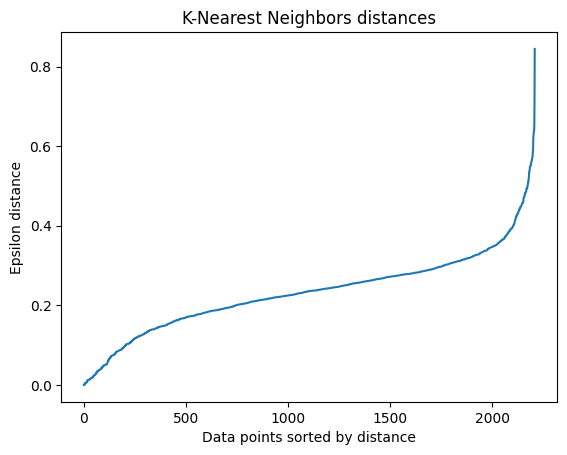

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 데이터 포인트 간의 거리 계산
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(doc_vectors)
distances, indices = nbrs.kneighbors(doc_vectors)

# 거리의 분포를 플롯
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-Nearest Neighbors distances')
plt.xlabel('Data points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()


## 전체 코드 함수화 및 자동화

In [ ]:
import pandas as pd
import re
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from gensim.models import FastText

# Define functions as previously provided
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^가-힣\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def train_text_classification_model(data):
    label_encoder = LabelEncoder()
    data['category_encoded'] = label_encoder.fit_transform(data['category'])
    X_train, X_test, y_train, y_test = train_test_split(data['full_text'], data['category_encoded'], test_size=0.2, random_state=42)
    pipeline = make_pipeline(TfidfVectorizer(max_features=1000), RandomForestClassifier(n_estimators=100, random_state=42))
    pipeline.fit(X_train, y_train)
    return pipeline

def tokenize_texts(data):
    return [word_tokenize(text) for text in data['full_text']]

def train_fasttext_model(tokenized_texts):
    ft_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, workers=4, sg=1)
    return ft_model

def document_vector(model, doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv], axis=0)

def perform_clustering(ft_model, tokenized_texts, num_clusters=20):
    doc_vectors = np.array([document_vector(ft_model, doc) for doc in tokenized_texts])
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(doc_vectors)
    return kmeans.labels_

# Load and process data for each company
companies = ['셀트리온', 'LG화학', '카카오뱅크', '크래프톤', 'S-Oil', '현대백화점', 'sk이노베이션', '아모레퍼시픽', '금호석유', '한온시스템']
data_dict = {}

for company in companies:
    file_path = f'/content/drive/MyDrive/Kwargs/뉴스 크롤링/csv/{company}_news_data.csv'
    data = pd.read_csv(file_path, encoding='utf-8')
    data['full_text'] = data['title'] + " " + data['content']
    data['full_text'] = data['full_text'].apply(preprocess_text)

    # Apply models and clustering
    pipeline = train_text_classification_model(data)
    tokenized_texts = tokenize_texts(data)
    ft_model = train_fasttext_model(tokenized_texts)
    clusters = perform_clustering(ft_model, tokenized_texts)

    # Store the data and clustering results
    data['cluster'] = clusters
    data_dict[company] = data

# Data is now processed and stored in data_dict with clustering results

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 계산
score = silhouette_score(doc_vectors, clusters)
print("Silhouette Score: ", score)


Silhouette Score:  0.20637274


## 정리된 코드 (최종)

### 로우데이터에 바로 작업시

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import FastText
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import re
import os

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text is re.sub(r'http\S+', '', text)
    text = re.sub(r'[^가-힣\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_texts(data):
    return [word_tokenize(text) for text in tqdm(data, desc="Tokenizing")]

def train_fasttext_model(tokenized_texts):
    return FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, workers=4, sg=1)

def document_vector(model, doc):
    # 모델이 인식하는 단어의 벡터들을 리스트에 저장
    vectors = [model.wv[word] for word in doc if word in model.wv]
    # 벡터 리스트가 비어있지 않다면 평균 벡터를 계산, 그렇지 않다면 0으로 채워진 벡터 반환
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # FastText의 벡터 크기를 사용하여 0 벡터 반환

def perform_clustering(doc_vectors, num_clusters=20):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    return kmeans.fit_predict(doc_vectors)

# 기업 목록
companies = ['셀트리온', 'LG화학', '카카오뱅크', '크래프톤', 'S-Oil', '현대백화점', 'sk이노베이션', '아모레퍼시픽', '금호석유', '한온시스템']

for company in tqdm(companies, desc="Processing companies"):
    file_path = f'/content/drive/MyDrive/Kwargs/뉴스 크롤링/csv/{company}_news_data.csv'
    data = pd.read_csv(file_path, encoding='utf-8')
    data['full_text'] = data['title'] + " " + data['content']
    data['full_text'] = [preprocess_text(text) for text in tqdm(data['full_text'], desc=f"Preprocessing {company}")]

    tokenized_texts = tokenize_texts(data['full_text'])
    ft_model = train_fasttext_model(tokenized_texts)
    doc_vectors = np.array([document_vector(ft_model, text) for text in tqdm(tokenized_texts, desc=f"Vectorizing {company}")])

    clusters = perform_clustering(doc_vectors)
    data['cluster'] = clusters

    save_path = f'/content/drive/MyDrive/Kwargs/전처리/{company}_clustered.csv'
    data.to_csv(save_path, index=False)


### 이미 해리가 돌린버전에 역으로 작업시

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import FastText
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import re

def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)  # 문자열이 아니면 문자열로 변환
    text = re.sub(r'<[^>]+>', '', text)
    text is re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^가-힣\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

companies = ['셀트리온', '크래프톤']
file_paths = {
    '셀트리온': '/content/drive/MyDrive/Kwargs/전처리/셀트리온_news_data_전처리.csv',
    '크래프톤': '/content/drive/MyDrive/Kwargs/전처리/크래프톤_news_data_전처리.csv'
}

def document_vector(model, doc):
    # 모델이 인식하는 단어의 벡터들을 리스트에 저장
    vectors = [model.wv[word] for word in doc if word in model.wv.key_to_index]
    # 벡터 리스트가 비어있지 않다면 평균 벡터를 계산, 그렇지 않다면 0으로 채워진 벡터 반환
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # FastText의 벡터 크기를 사용하여 0 벡터 반환

# 기업 데이터 처리
for company in tqdm(companies, desc="Processing companies"):
    file_path = file_paths[company]
    data = pd.read_csv(file_path, encoding='utf-8')
    data['full_text'] = data['title'].fillna('') + " " + data['content'].fillna('')
    data['full_text'] = [preprocess_text(text) for text in tqdm(data['full_text'], desc=f"Preprocessing {company}")]

    tokenized_texts = [word_tokenize(text) for text in tqdm(data['full_text'], desc="Tokenizing")]
    ft_model = train_fasttext_model(tokenized_texts)
    doc_vectors = np.array([document_vector(ft_model, text) for text in tqdm(tokenized_texts, desc=f"Vectorizing {company}")])

    clusters = perform_clustering(doc_vectors)
    data['cluster'] = clusters

    save_path = f'/content/drive/MyDrive/Kwargs/전처리/{company}_clustered.csv'
    data.to_csv(save_path, index=False)



Processing companies:   0%|          | 0/2 [00:00<?, ?it/s]

Preprocessing 셀트리온:   0%|          | 0/4244 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/4244 [00:00<?, ?it/s]

Vectorizing 셀트리온:   0%|          | 0/4244 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Preprocessing 크래프톤:   0%|          | 0/6452 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/6452 [00:00<?, ?it/s]

Vectorizing 크래프톤:   0%|          | 0/6452 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 0523버전

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import FastText
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import re
import os

# 텍스트 전처리 함수
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # 영어, 숫자, 한글, 공백만 남기기
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 데이터 토큰화 함수
def tokenize_texts(data):
    return [word_tokenize(text) for text in tqdm(data, desc="Tokenizing")]

# FastText 모델 훈련 함수
def train_fasttext_model(tokenized_texts):
    return FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, workers=4, sg=1)

# 문서 벡터 계산 함수
def document_vector(model, doc):
    vectors = [model.wv[word] for word in doc if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 클러스터링 수행 함수
def perform_clustering(doc_vectors, num_clusters=20):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    return kmeans.fit_predict(doc_vectors)

# 데이터 로딩 및 클러스터링 실행
def process_data(file_path):
    data = pd.read_csv(file_path, encoding='utf-8')
    data['full_text'] = data['title'] + " " + data['content']
    data['full_text'] = [preprocess_text(text) for text in tqdm(data['full_text'], desc="Preprocessing")]

    tokenized_texts = tokenize_texts(data['full_text'])
    ft_model = train_fasttext_model(tokenized_texts)
    doc_vectors = np.array([document_vector(ft_model, text) for text in tqdm(tokenized_texts, desc="Vectorizing")])

    clusters = perform_clustering(doc_vectors)
    data['cluster'] = clusters
    return data

# 메인 실행 블록
if __name__ == "__main__":
    base_path = '/content/drive/MyDrive/Kwargs/전처리/완성'
    file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.endswith('preprocessing.csv')]  # CSV 파일 필터링

    for file_path in tqdm(file_paths, desc="Processing files"):
        clustered_data = process_data(file_path)
        print(clustered_data.head())  # 출력하여 확인
        clustered_data.to_csv(file_path.replace('.csv', '_clustered.csv'), index=False)  # 클러스터 결과 저장


Processing files:   0%|          | 0/18 [00:00<?, ?it/s]

Preprocessing:   0%|          | 0/4408 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/4408 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/4408 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                  title                 date  \
0     삼성전자, '쉴땐 쉬는 문화' 정착…10년 前부터 자율출근제  2019-02-06 15:15:15   
1  美 글로벌파운드리, 삼성전자·SK하이닉스가 인수하면 사업확대-KB  2019-02-18 08:40:48   
2             화웨이 폴더플폰 삼성전자보다 70만원 더 비싸  2019-02-25 07:45:10   
3  우울한 삼성전자 IM부문, 올해 무기는 갤럭시S10·폴더블·5G폰  2019-01-31 14:48:17   
4           트럼프 압박에도…삼성·LG전자 세탁기 끄떡 없었다  2019-02-11 15:25:58   

                                             content category  \
0  2018년 7월부터 연구개발. RD.  및 사무직을 대상으로 실시한 . 선택적 근로...       경제   
1  앞서 글로벌 파운드리는 8나노 이하 미세공정 개발을 중단하고.  일부 팹. fab....       경제   
2  삼성전자는 전주 폴더블폰인 갤럭시 폴드를 공개했었다.  이날 화웨이가 공개한 메이트...       경제   
3  삼성전자 IM부문. IT모바일 커뮤니케이션즈. 은 지난해 4. 4분기 영업이익이 1...     IT과학   
4  재계는 제품 경쟁력을 바탕으로 한 고급화 전략과 현지 공장 조기가동 등 효율적 대응...       경제   

                                           full_text  cluster  
0  삼성전자 쉴땐 쉬는 문화 정착10년 前부터 자율출근제 2018년 7월부터 연구개발 ...        0  
1  美 글로벌파운드리 삼성전자SK하이닉스가 인수하면 사업확대KB 앞서 글로벌 파운드리는...       19  
2  화웨이 폴더플폰 삼성전자보다 70만원 더 비싸 삼성전

Preprocessing:   0%|          | 0/8206 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/8206 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/8206 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               title                 date  \
0                     대기업 연구소는 ‘FBI’로 통한다…“미래ㆍ인재 산실”  2019-03-01 08:02:08   
1  SK하이닉스(000660) 종목알파고 분석, 외국인/기관 실시간 수급과 추가 매수 ...  2019-01-17 09:52:42   
2                          뉴스룸/황태호]SK하이닉스를 짝사랑만 할건가?  2019-02-08 03:03:59   
3                  이완구 SK하이닉스 용인 입주는 균형발전 대명분과 정면 충돌  2019-02-22 15:39:39   
4                   구미시 5공단에 SK하이닉스 반도체 오면 대규모 스팀 공급  2019-01-25 16:55:19   

                                             content category  \
0  . F.  그룹 미래. Future.  책임지는 전략기지 삼성은 인공지능. AI. ...       경제   
1  분석 요약기업 요약.  매출과 영업이익.  순이익 모두 신기록 . 2019년 01월...       경제   
2  최근 제2 본사와 신공장 입지를 각각 결정한 미국 아마존과 대만 TSMC의 사례와 ...     오피니언   
3  이어 물론 SK 일각에서 얘기하는 용인 투자계획은 삼성반도체와 함께 협력 업체와의 ...       사회   
4  구미시는 이를 한국전력거래소에 판매해 연간 4억여원의 수입을 얻고 있다.  시는 산...       사회   

                                           full_text  cluster  
0  대기업 연구소는 FBI로 통한다미래ㆍ인재 산실 F 그룹 미래 Future 책임지는 ...       10  
1  SK하이닉스000660 종목

Preprocessing:   0%|          | 0/5892 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/5892 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/5892 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               title                 date  \
0            LG전자-구글, 시그니처 키친 스위트 쇼룸에서 스마트홈 솔루션 선보인다  2019-02-15 15:00:43   
1  LG화학·IBM·포드, 블록체인 기술로 분쟁광물 코발트 유통 추적···‘아동 착취’...  2019-01-17 05:52:53   
2           '스마트시티 챌린지' 사업…광주, 부천, 수원, 창원, 대전, 인천 선정  2019-05-02 11:11:05   
3               이데일리N] 아시아나항공, '자산매각·노선정리·조직개편 단행' 外  2019-04-02 14:51:01   
4  설마 대기업이 그런 짓까지 하겠어?! 대기오염 물질 조작, 오물 뒤집어쓴 LG·한화...  2019-04-19 10:15:02   

                                             content category  \
0  LG전자는 조만간 현재 운영중인 논현동 시그니처 키친 스위트 쇼룸에서 건설사 등 B...       경제   
1  16일. 현지시간.  IBM은 광물 코발트. Cobalt. 의 유통을 추적하는 파일...       경제   
2  국토교통부는 스마트시티 챌린지 사업 공모 결과 이들 6개 지역을 선정했다고 2일 밝...       경제   
3  외국은행 국내지점 작년 순익 8600억전년比 27. . 3.  SK이노베이션.  소...       경제   
4  이들 단체는 회견에서 LG화학. 한화케미칼 등 일부 부도덕한 기업들은 대기오염물질 ...       경제   

                                           full_text  cluster  
0  LG전자구글 시그니처 키친 스위트 쇼룸에서 스마트홈 솔루션 선보인다 LG전자는 조만...        7  
1  LG화학IBM포드 블록체인 

Preprocessing:   0%|          | 0/8174 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/8174 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/8174 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               title                 date  \
0                            1월1일자 한겨레만 3년째 삼성광고 없었다  2019-01-02 16:28:52   
1                        중앙시평] 삼바 사건과 무시된 회계 전문가의 견해  2019-02-16 00:21:22   
2                        즉시연금·암보험 분쟁담당 직원에 상 몰아준 윤석헌  2019-01-02 14:45:12   
3  삼성바이오로직스(207940) 종목알파고 분석, 외국인/기관 실시간 수급과 추가 매...  2019-01-28 09:56:29   
4                 KT 회장 소환·가습기살균제 재수사 탄력…속도내는 檢 기업수사  2019-02-21 06:15:00   

                                             content category  \
0  지난 2017년과 2018년에도 한겨레만 삼성광고가 없었다.  지난 1일 경향신문....       사회   
1  일부에서 . 삼성바이오로직스. 이하 SBL. 삼바.  분식회계. 라고 부르는 사건이...     오피니언   
2  .  임원인사.  불확실성 있지만 이달내 예상 윤석헌 금융감독원장이 올해도 금융소비...       경제   
3  분석 요약기업 요약.  매출증진 위한 시설과 사업영업 확대중 . 2019년 01월 ...       경제   
4  21일 검찰에 따르면 서울중앙지검 특수3부. 부장 양석조. 는 정치인들에게 이른바 ...       사회   

                                           full_text  cluster  
0  1월1일자 한겨레만 3년째 삼성광고 없었다 지난 2017년과 2018년에도 한겨레만...       13  
1  중앙시평 삼바 사건과 무시된

Preprocessing:   0%|          | 0/7081 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/7081 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/7081 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                           title                 date  \
0            영상] 휴게소서 의식잃고 '쿵'…출장 가던 현대차 직원들이 살려  2019-02-12 11:28:28   
1                울산시, 수소경제 후속사업 발굴나서…현대차·SK가스 참여  2019-02-15 07:37:13   
2   광주시와 현대차 손잡고 신설할 완성차 법인, 이르면 2021년 하반기 가동 전망  2019-01-31 22:01:50   
3  '블루베리' 패널로 문성후 박사 합류…“수소차 보급은 현대차만의 숙제 아냐” 주장  2019-02-13 15:49:31   
4           단독] 택시 반발 걱정에 '시동' 끈 현대車-롯데 '공유차 연합'  2019-02-12 17:49:44   

                                             content category  \
0  잠시 후 A씨는 스스로 호흡하는 기미가 보이고 눈빛이 정상으로 돌아왔으며 직원들은 ...       사회   
1  회의에는 현대자동차.  SK가스.  에쓰오일.  두산.  효성중공업.  한국수소산업...       사회   
2  현대차는 31일 광주시가 제시한 . 지역경제 활성화 및 일자리 지속 창출을 위한 완...     생활문화   
3  SBSCNBC . 임윤선의 블루베리.  2월 13일 수요일 밤 9시 방송.  새 시...       경제   
4  12일 투자은행. IB. 업계에 따르면 현대차는 500억원 이상을 투입해 롯데렌탈이...     생활문화   

                                           full_text  cluster  
0  영상 휴게소서 의식잃고 쿵출장 가던 현대차 직원들이 살려 잠시 후 A씨는 스스로 호...       10  
1  울산시 수소경제 후속사업 발굴나서현대차SK가스 참여 회의에는 현대자동차

Preprocessing:   0%|          | 0/5363 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/5363 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/5363 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                      title                 date  \
0    사설] 현대차 정기공채 폐지, 4차 산업혁명 시대 채용혁신 계기 되길  2019-02-15 00:03:07   
1                인건비에 옴짝달싹..매력 잃는 한국 자동차 산업  2019-02-22 16:55:00   
2  분야·업종 칸막이 없이 ‘열린 혁신’… ICT·AI 품고 미래車 ‘질주’  2019-02-14 11:11:08   
3                 ‘임원 휴가’ 권하는 현대차…‘새 미래’ 열까  2019-02-26 14:21:03   
4     통상임금에 상여금 포함해 매달 지급 기아車 제안에…노조는 즉각 거부  2019-02-12 20:19:58   

                                             content category  \
0  국내 5대 그룹 중 처음이다.  시장 환경과 기술이 급변하는 상황에서 지금 같은 인...     오피니언   
1  업계는 인건비 리스크로 고비용. 저효율 생산구조가 지속되며 자칫 한국 자동차산업의 ...     생활문화   
2  현대기아차는 자체 기술력 강화에도 주력하고 있지만 다양한 분야의 업체들과 제휴 및 ...       경제   
3  그런데 올해부터는 토요당번 근무제가 없어졌고.  연간 휴가는 시기에 관계 없이 최장...       경제   
4  상여금 제도를 바꾸지 않으면 1000명이 넘는 직원이 최저임금 기준에 미달하는 사태...       경제   

                                           full_text  cluster  
0  사설 현대차 정기공채 폐지 4차 산업혁명 시대 채용혁신 계기 되길 국내 5대 그룹 ...        6  
1  인건비에 옴짝달싹매력 잃는 한국 자동차 산업 업계는 인건비 리스크로 고비용 저효율 ...       12  
2  분야업종 

Preprocessing:   0%|          | 0/4217 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/4217 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/4217 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               title                 date  \
0         재직자 “내년 우리 회사 주식 오른다”..셀트리온, 삼성SDI, 대우조선해양  2019-01-03 11:18:09   
1                  “‘휴미라’ 복제약, 일부는 오리지널보다 주사시 더 아프다”  2019-01-31 13:45:40   
2                   ET투자뉴스]바이오주 테마_테마에 대한 우호적인 환경 조성  2019-02-28 09:56:03   
3  셀트리온헬스케어(091990) 종목알파고 분석, 외국인/기관 실시간 수급과 추가 매...  2019-01-30 09:54:03   
4                 셀트리온의 새해 주가 모멘텀 키워드 ‘램시마, 3공장, 직판’  2019-01-07 16:08:28   

                                             content category  \
0  직장인 2명 중 1명 . 내년 우리 회사 주가 내린다. 설문 조사에 응답한 직장인 ...     IT과학   
1  31일 영국 국립보건서비스. NHS. 의 최근 조사 결과에 따르면 휴미라 주성분인 ...       경제   
2  12.  상승이 시각 현재 바이오주 테마 내의 종목들이 모두 상승세를 보이며 좋은 ...       경제   
3  분석 요약기업 요약.  강력한 모멘텀 발생 . 2019년 01월 02일 업데이트. ...       경제   
4  증권가에서도 내년부터 셀트리온의 이익 증가세가 본격화될 것으로 예측하고 있다.  7...       경제   

                                           full_text  cluster  
0  재직자 내년 우리 회사 주식 오른다셀트리온 삼성SDI 대우조선해양 직장인 2명 중 ...       17  
1  휴미라 복제약 일부는 오리지

Preprocessing:   0%|          | 0/4278 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/4278 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/4278 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                         title                 date  \
0                     “올 韓 수출변수는 美·中 무역전쟁” 34%  2019-01-02 12:00:40   
1  매장량 과대평가·가공비용 부담…북한 ‘자원 대박’은 멀다 [한반도가 경제다 ②  2019-01-09 06:01:49   
2                 ‘좌절과 환희’ 60년을 이어온 한국 자본시장 역사  2019-01-28 17:38:46   
3             지난해 12월 경북지역 상장사들, 시총 1조4000억 감소  2019-01-12 03:09:58   
4                       통상조직 정비 나선 철강, 보호무역 대응  2019-01-22 15:59:10   

                                             content category  \
0  2일 문화일보가 실시한 . 2019년 한국경제전망 전문가 100인 설문조사. 에서 ...       경제   
1  .  세계적 투자자인 로저스홀딩스 짐 로저스 회장의 이 한마디가 최근 북한의 변화를...       정치   
2  하지만 현대적 형태의 증권거래소가 처음 등장한 것은 1956년 당시 재무부의 주도로...       경제   
3  70. . 1조4063억원.  감소한 50조7028억원으로 집계됐다.  이는 미중 ...       사회   
4  22일 업계에 따르면 포스코는 무역통상 전담 조직의 수장 인선을 다음 달 초 마무리...       경제   

                                           full_text  cluster  
0  올 韓 수출변수는 美中 무역전쟁 34 2일 문화일보가 실시한 2019년 한국경제전망...       14  
1  매장량 과대평가가공비용 부담북한 자원 대박은 멀다 한반도가 경제다 ② 세계적 투자자...  

Preprocessing:   0%|          | 0/7857 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/7857 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/7857 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    title                 date  \
0      경기확산지수 5개월 연속 반등…IT 등 경기민감주 다시 주도권  2019-02-07 07:46:10   
1   기술 변곡점에 선 삼성전기·포스코켐텍···'미래 소재' 톱니 맞춘다  2019-02-24 16:54:00   
2               오성, 브러쉬 없앤 충전함마드릴 신제품 출시   2019-01-22 16:43:07   
3  10분간 ‘고객’ 30번 언급한 구광모, ‘신차’ 출시 발표한 정의선  2019-01-02 15:37:00   
4          전영현 삼성SDI 사장 높이 나는 새는 명중되지 않는다  2019-01-02 10:00:00   

                                             content category  \
0  IT 등 경기민감주가 주도권을 잡을 것이란 분석이다.  이재만 하나금융투자 투자전략...       경제   
1  이병준 삼성전기 경영지원실장. 전무. 은 . 기술 변곡점. 이 실적 상승의 모멘텀이...       경제   
2  브러쉬의 마모로 인한 에너지 손실이 적고 마찰이 없어 발열과 소음을 줄였다.  기존...       경제   
3  그룹 총수가 된 이후 공개석상 첫 발언을 한 구광모 LG그룹 회장은 자신의 첫 신년...       경제   
4  전 사장은 높이 나는 새는 포수의 총에 명중되지 않는다며 기술을 지배하는 회사가 산...       경제   

                                           full_text  cluster  
0  경기확산지수 5개월 연속 반등IT 등 경기민감주 다시 주도권 IT 등 경기민감주가 ...       12  
1  기술 변곡점에 선 삼성전기포스코켐텍미래 소재 톱니 맞춘다 이병준 삼성전기 경영지원실...        2  
2  오성 브러쉬 없앤 충전함마드릴 

Preprocessing:   0%|          | 0/7507 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/7507 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/7507 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                               title                 date  \
0   '살 빠지는 당뇨약' 시장 커진다…1년새 매출 40% 늘어  2019-02-18 06:07:14   
1  `영업이익 1조` 달성 GS건설, 이젠 신용등급 상향 가시권  2019-02-06 18:26:06   
2             미래車시장 `총성없는 기술戰`은 시작됐다  2019-02-01 16:12:09   
3            고령화 시대 '고지혈·고혈압·당뇨약' 불티  2019-01-28 14:28:28   
4     韓 배터리, 中·日 공세에 고전…성장률 시장평균 밑돌아  2019-02-08 10:57:25   

                                             content category  \
0  인슐린을 분비하는 췌장 대신 신장에 작용해 췌장에 부담을 주지 않으면서 체중감소로 ...       경제   
1  올해도 강점인 주택 사업을 강화하면서 실적 증가와 재무구조 개선이라는 . 두 마리 ...       경제   
2  3t을 모두 채우고도 정지 상태에서 시속 100. 까지 도달하는 데 20초 정도 소...     생활문화   
3  .  작년 처방액 상위 30개중 18개 차지 고령화와 서구화된 식습관으로 만성질환자...       경제   
4  8일 배터리 시장조사기관인 SNE리서치에 따르면 2018년 연간 세계 각국에 차량 ...       경제   

                                           full_text  cluster  
0  살 빠지는 당뇨약 시장 커진다1년새 매출 40 늘어 인슐린을 분비하는 췌장 대신 신...        9  
1  영업이익 1조 달성 GS건설 이젠 신용등급 상향 가시권 올해도 강점인 주택 사업을 ...       19  
2  미래車시장 총성없는 기술戰은 시작됐다 3t을 모두 채우고도 정지 상태에서 시속 10.

Preprocessing:   0%|          | 0/10254 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/10254 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/10254 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                      title                 date  \
0                     16일 킹스로드 오프라인 게임 성주대회  2019-02-13 10:59:59   
1                     광주시, 광주FC 2019 시즌권 구매  2019-02-18 16:39:23   
2  특징주]골든브릿지·SK證, 네이버 피인수 대상 추측에 각각 15%·5%↑  2019-01-07 09:10:43   
3          지상컨설팅 Q&A] 수시·정시 불합격자, 3월 입학 방법은  2019-02-18 19:09:09   
4              시총 톱10 임원 출신대학, SKY캐슬보다 '여기'  2019-02-15 06:40:00   

                                             content category  \
0  이 게임은 지난해 한국콘텐츠진흥원의 지역특화사업으로 개발된 작품으로.  게이머가 세...       사회   
1  이날 전달식은 광주FC 구단주로서 2019시즌 승격을 목표로 하는 선수들의 사기 진...       사회   
2  7일 오전 9시8분 기준 골든브릿지증권은 전 거래일보다 270원. 15.  34. ...       경제   
3  2019년 3월에 대학에 입학할 수 있는 방법이 있을까요. A.  2019학년도 수...       사회   
4  그런데 국내 주요 상장사 임원들의 학력을 살펴보면 SKY출신보다 . 해외 유학파. ...       경제   

                                           full_text  cluster  
0  16일 킹스로드 오프라인 게임 성주대회 이 게임은 지난해 한국콘텐츠진흥원의 지역특화...       17  
1  광주시 광주FC 2019 시즌권 구매 이날 전달식은 광주FC 구단주로서 2019시즌...        5  
2  특징주골든

Preprocessing:   0%|          | 0/9598 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/9598 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/9598 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                              title                 date  \
0        스페셜 리포트] 한국에는 ‘CEO 시장’이 없다  2019-02-08 19:59:57   
1      고의 공시누락?…근거없다 법정서 맞붙은 삼바-증선위  2019-02-11 18:45:50   
2   사라지는 로또아파트·깨지는 분양공식…'대마불사'는 통할까  2019-02-26 10:38:00   
3    한진칼에만 최소한 경영참여…반쪽짜리 절충안 나온 이유는  2019-02-01 15:28:05   
4  마켓뷰] 뒷심 발휘한 코스피…1월에만 3.4조원 산 외국인  2019-01-29 16:44:06   

                                             content category  \
0  두 부문은 2014년까지 통합 운영돼오다가 2015년 각 부문의 전문성 제고를 위해...       정치   
1  이날 심문은 삼성바이오로직스가 증선위를 상대로 지난해 10월 행정소송을 제기한데 따...       사회   
2  지난 달에는 서울에서는 무조건 청약이 마감된다는 . 서울불패.  신화가 깨졌다.  ...       경제   
3  1일 국민연금의 최고의사결정기구인 기금운용위원회는 2019년 제2차 회의를 열고 한...       사회   
4  반면 코스닥지수는 4거래일 연속 오름세를 멈추고 숨고르기를 택했다.  29일 코스피...       경제   

                                           full_text  cluster  
0  스페셜 리포트 한국에는 CEO 시장이 없다 두 부문은 2014년까지 통합 운영돼오다...       10  
1  고의 공시누락근거없다 법정서 맞붙은 삼바증선위 이날 심문은 삼성바이오로직스가 증선위...       17  
2  사라지는 로또아파트깨지는 분양공식대마불사는 통할까 지난 달에는 서울에서는 무조건 청...    

Preprocessing:   0%|          | 0/6363 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/6363 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/6363 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               title                 date  \
0                             따박따박 받는 수익이 한방을 이기는 시대  2019-02-13 03:12:40   
1                           판 커지는 제3인터넷銀…하나금융도 `출사표`  2019-02-13 17:53:04   
2                         금융위·김병욱 의원, 신용정보법 입법공청회 개최  2019-02-11 11:21:25   
3                노조 파업으로 본 KB 현주소]밥그릇만 챙기다 성장판 닫힐 수도  2019-01-09 05:01:01   
4  연초부터 뜨거운 M&A전] 롯데카드 입찰만 10여곳...롯데 금융계열사가 기름 부은...  2019-01-30 17:45:23   

                                             content category  \
0  올 들어 증시가 반짝 상승하고 있지만.  재테크 시계. 視界. 는 여전히 불확실하다...       경제   
1  13일 금융권에 따르면 하나금융은 SK텔레콤과 함께 이르면 이번주 중 제3인터넷은행...       경제   
2  고학수 서울대 법학전문대학원 교수와 서정호 금융연구원 선임 연구위원이 . 데이터경제...       경제   
3  하지만.  거스를 수 없는 시대 흐름을 역행한다는 점에서 국민은행 노조를 지켜보는 ...       경제   
4  이와 더불어 시장에서 잠재적 매물로 거론되는 다른 증권.  보험사들도 주목을 받고 ...       경제   

                                           full_text  cluster  
0  따박따박 받는 수익이 한방을 이기는 시대 올 들어 증시가 반짝 상승하고 있지만 재테...        7  
1  판 커지는 제3인터넷銀하나금

Preprocessing:   0%|          | 0/8076 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/8076 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/8076 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                      title                 date  \
0                  유통 & 패션] 요즘 뷰티는 `캐릭터 천국`  2019-02-14 04:06:08   
1                     조재범 상습 성폭행 인정된 4가지 이유  2019-02-06 12:16:59   
2                카풀에 타다까지...공유업체-대중교통 정면 충돌  2019-02-19 14:15:21   
3  김연정 대표 비 오면 실내 관광지, 점심엔 맛집…해외여행 상황 따라 추천  2019-02-19 18:08:04   
4                         ‘세뱃돈’ 불려줄 은행상품 러시  2019-02-08 11:27:02   

                                             content category  \
0  어린 시절 동심을 재소환하는 캐릭터부터 이모티콘.  영화 시리즈 등으로 인기를 끈 ...       경제   
1  첫째.  조 전 코치와 피해자 심석희 선수가 문자메시지.  카카오톡.  텔레그램 등...       사회   
2  타다를 운영하는 이재웅 쏘카 대표는 고발자를 업무방해와 무고로 강력히 법적대응 할 ...     생활문화   
3  간신히 여행계획을 다 짜면 이미 여행을 다녀온 것처럼 진이 빠진다.  이처럼 번거로...       경제   
4  신한에서는 지난해 11월 출시해 꾸준한 인기를 누린 . 작심 3일 적금. 이 연휴에...       경제   

                                           full_text  cluster  
0  유통 패션 요즘 뷰티는 캐릭터 천국 어린 시절 동심을 재소환하는 캐릭터부터 이모티콘...       17  
1  조재범 상습 성폭행 인정된 4가지 이유 첫째 조 전 코치와 피해자 심석희 선수가 문...       15  
2  카풀에 타

Preprocessing:   0%|          | 0/5464 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/5464 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/5464 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    title                 date  \
0                 긴~ 명절연휴, ' 이 종목들' 챙겨보세요  2019-02-04 06:43:00   
1         마켓뷰] 현대차 주주 활짝 웃은 날…대북주에 쏠리는 관심  2019-02-27 16:24:05   
2         배당 늘려줄게 주총엔 오지마?…여전한 ‘슈퍼 주총데이’   2019-02-17 18:46:24   
3                       지금까지 이런 주주제안은 없었다  2019-02-27 16:40:04   
4  현대·기아차, 작년 4Q 실적 전망치 하회할 듯..`중립` 유지-신한  2019-01-15 08:37:34   

                                             content category  \
0  KB증권은 대한항공.  휠라코리아.  LG생활건강.  CJ제일제당.  DB손해보험....       경제   
1  외국인과 기관 자금이 동시에 유입된 자동차. 화학 업종이 눈에 띄는 강세를 보였다....       경제   
2  17일 한국상장회사협의회와 코스닥협회가 파악한 결과. 15일 기준. 를 보면.  1...       경제   
3  5조 요구. 에 3년 2.  6조 주주환원으로 맞대응미국계 헤지펀드 엘리엇 매니지먼...       경제   
4  현대차의 작년 4분기 영업이익은 7098억원.  기아차는 3604억원으로 시장 컨센...       경제   

                                           full_text  cluster  
0  긴 명절연휴 이 종목들 챙겨보세요 KB증권은 대한항공 휠라코리아 LG생활건강 CJ제...       19  
1  마켓뷰 현대차 주주 활짝 웃은 날대북주에 쏠리는 관심 외국인과 기관 자금이 동시에 ...        5  
2  배당 늘려줄게 주총엔 오지마여전

Preprocessing:   0%|          | 0/5847 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/5847 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/5847 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                   title                 date  \
0                 추적자 ‘신토불이’…선두 ‘카뱅’ 넘을까  2019-02-12 11:08:34   
1            조용병 “신임 사외이사들, 글로벌 조언 해줄 것”  2019-02-28 10:15:01   
2                다시 이자금융지주사…그래도 자산관리는 성과  2019-02-13 10:42:33   
3  ET투자뉴스]SK_주요 매물구간인 270,500원선이 저항대로 작용  2019-01-02 11:59:25   
4               금리 불확실성·파업...은행株 연초부터 출렁  2019-01-11 15:12:39   

                                             content category  \
0  .  자금 약점자금력 갖춘 신한.  .  .  출자 한계지배구조사업모델 . 안갯속....       경제   
1  가계부채 대책과 신용카드수수료 인하.  자본규제 강화 등으로 국내 은행.  카드. ...       경제   
2  13일까지의 지난해 실적발표를 종합하면 신한지주는 지난해 3조1567억원의 순익으로...       경제   
3  07.  하락했다.  동기간 동안에 변동성을 나타내는 지표인 표준편차는 1.  2....       경제   
4  신한지주 주가는 전날. 10일.  유가증권시장에서 3만8350원으로 거래를 마쳤다....       경제   

                                           full_text  cluster  
0  추적자 신토불이선두 카뱅 넘을까 자금 약점자금력 갖춘 신한 출자 한계지배구조사업모델...        6  
1  조용병 신임 사외이사들 글로벌 조언 해줄 것 가계부채 대책과 신용카드수수료 인하 자...        4  
2  다시 이자금융지주사그래도 자산관리는 성과 

Preprocessing:   0%|          | 0/7077 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/7077 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/7077 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                   title                 date  \
0  “덜 준 보험금 달라” 2000명 무더기 신청…보험사는 ‘좌불안석’  2019-01-15 06:01:01   
1   ET투자뉴스]LG_관련종목들 중에서 변동성은 낮지만 수익률은 높아  2019-01-15 14:30:01   
2           이동걸식 대우조선해양 해법은 '국민혈세 몰아주기'?  2019-02-07 09:22:15   
3              삼성생명, 계열사 부동산 펀드 975억원 투자  2019-02-27 14:51:22   
4             `모범 상장사`에 꽂힌 외국인…올해 3조 순매수  2019-02-19 17:25:04   

                                             content category  \
0  지난해 생명보험 업계를 달군 즉시연금 과소 지급액 사태의 파문이 일파만파로 재확산될...       경제   
1  38.  상승했다.  같은 기간동안에 위험를 나타내는 지표인 표준편차는 2.  2....       경제   
2  이에 따라 현대중공업은 산업은행이 보유한 대우조선해양 지분 전량을 현금 지불 부담 ...       경제   
3  회사 관계자는 투자금액 975억원은 최대 한도로 변동 가능하며.  여러개의 투자신탁...       경제   
4  올 들어 두드러진 현상이다.  외국인은 삼성전자를 비롯해 SK LG화학 LG생활건강...       경제   

                                           full_text  cluster  
0  덜 준 보험금 달라 2000명 무더기 신청보험사는 좌불안석 지난해 생명보험 업계를 ...       14  
1  ET투자뉴스LG_관련종목들 중에서 변동성은 낮지만 수익률은 높아 38 상승했다 같은...       18  
2  이동걸식 대우조선해양 해법은 국민혈세 몰아

Preprocessing:   0%|          | 0/4888 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/4888 [00:00<?, ?it/s]

Vectorizing:   0%|          | 0/4888 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                              title                 date  \
0       윤종규 vs 조용병…'리딩금융' 타이틀 놓고 접전  2019-01-31 10:25:38   
1  1등 도약 선언한 손태승號…'금융지주 五國志' 개막(종합)  2019-01-14 16:43:47   
2   마켓인사이트] KCGI, 한진그룹에 지배구조위 설치 요구  2019-01-21 17:51:50   
3          금융권 브리프]대우조선 한배 탄 산은-현대重  2019-02-02 07:01:59   
4         회장 이어 행장도… 금감원-하나은'연임 2R'  2019-02-27 17:46:09   

                                             content category  \
0  지난해 4분기 KB금융의 판관비 증가에 따른 실적 부진으로 두 지주사의 연간 당기순...       경제   
1  손 회장은 14일 우리금융지주 출범 기자간담회에서 우리금융지주의 가장 큰 취약점인 ...       경제   
2  이 위원회는 KCGI가 추천한 사외이사 2명.  외부 전문가 3명.  회사가 추천한...       경제   
3  금융위와 실무 조율 과정에서 보완 지시를 받았기 때문이다.  금감원은 애초 각 업권...       경제   
4  27일 금융권에 따르면 하나금융지주 임원후보추천위원회는 하나은행의 차기 행장 선임을...       경제   

                                           full_text  cluster  
0  윤종규 vs 조용병리딩금융 타이틀 놓고 접전 지난해 4분기 KB금융의 판관비 증가에...       11  
1  1등 도약 선언한 손태승號금융지주 五國志 개막종합 손 회장은 14일 우리금융지주 출...       14  
2  마켓인사이트 KCGI 한진그룹에 지배구조위 설치 요구 이 위원회는 KCGI가 추천한...    

### 클러스터링 된 파일 불러와서 각 군집 내용 직접 확인하고 제거한 후 저장


In [ ]:
import pandas as pd
import os

def print_cluster_samples(data, num_samples=10):
    """Prints samples from each cluster within the provided data."""
    for i in range(data['cluster'].max() + 1):
        print(f"Cluster {i}:")
        cluster_data = data[data['cluster'] == i]
        if len(cluster_data) < num_samples:
            print(cluster_data['full_text'])
        else:
            print(cluster_data['full_text'].sample(num_samples))
        print("\n")

def process_company_file(base_path, company_name):
    """Find and process the file for a given company, choosing filtered if available."""
    filtered_file_name = f"{company_name}_filtered.csv"
    clustered_file_name = f"{company_name}_preprocessing_clustered.csv"

    filtered_file_path = os.path.join(base_path, filtered_file_name)
    clustered_file_path = os.path.join(base_path, clustered_file_name)

    # Check if a filtered file already exists
    if os.path.exists(filtered_file_path):
        file_path = filtered_file_path
        print(f"A filtered file already exists for {company_name}, loading {filtered_file_name}.")
    elif os.path.exists(clustered_file_path):
        file_path = clustered_file_path
        print(f"No filtered file found, loading {clustered_file_name}.")
    else:
        print(f"No files found for {company_name}. Please check the company name and try again.")
        return

    # Load and process the file
    data = pd.read_csv(file_path)
    print(f"Now processing: {file_path}")
    print_cluster_samples(data)

    # If the loaded file was already filtered, no further action is needed.
    if file_path == filtered_file_path:
        print("This file has already been filtered. No further action is required.\n")
        return

    # Otherwise, process clustering and ask for clusters to exclude
    user_input = input(f"Enter cluster numbers to exclude for {company_name} separated by spaces, or press ENTER to skip: ").strip()
    if user_input == "":
        print("No changes made. Skipping this file.\n")
        return

    try:
        exclude_clusters = list(map(int, user_input.split()))
        filtered_data = data[~data['cluster'].isin(exclude_clusters)]
        filtered_data.to_csv(filtered_file_path, index=False)
        print(f"Filtered data saved to {filtered_file_path}\n")
    except ValueError:
        print("Invalid input. Please enter valid numbers separated by spaces, or press ENTER to skip.\n")

# 파일 경로 설정
base_path = '/content/drive/MyDrive/Kwargs/전처리/완성'

# 사용자로부터 기업명 입력 받기
company_name = input("Enter the company name to process: ")

# 파일 처리 함수 호출
process_company_file(base_path, company_name)


Enter the company name to process: 삼성물산
No filtered file found, loading 삼성물산_preprocessing_clustered.csv.
Now processing: /content/drive/MyDrive/Kwargs/전처리/완성/삼성물산_preprocessing_clustered.csv
Cluster 0:
9284    영업익 1조 시대 삼성바이오로직스 네쌍둥이 공장 짓는 이유 일찍이 시장에 진입한 삼...
6988    정의선 IRA 대응 위해 방미신동빈은 베트남서 유통사업 강화 24일 산업계에 따르면...
4100    삼성SK 반도체 MA설 솔솔기술보호주의 등 변수 다만 미국과 중국 유럽연합 EU 등...
9536    내년은 더 힘들다홈쇼핑 수장 교체로 위기 돌파할까 다만 내년에도 쉽지 않은 환경이 ...
6481    SK 삼성 종로타워 새 주인 된다 이에 따라 SK리츠운용은 조만간 종로타워 매입 절...
6367    IPO 빙하기 녹인 성일하이텍뜨거운 폐배터리 왜 이렇게 시장의 관심이 뜨거운지 취재...
350     주총포커스 삼성물산 어려운 경영환경 내실경영 약속 이날 주총에서는 재무제표 및 연결...
9081    SMR 리스크 현실화하나 美 지분투자 국내 건설사 악재 14일 삼성물산 사업보고서와...
360     삼성 바이오사업 10년그 영광과 시련 양재준 기자의 알투바이오 하지만 바이오사업에 ...
5466    특징주 TCC스틸 삼성 자율주행 상표 등록원형배터리 2배 확대 원통형 캔 독점 공급...
Name: full_text, dtype: object


Cluster 1:
8399    美 네트워크 가동한 JY버라이즌구글 CEO 만난다 이후 귀국하지 않고 이달 중순까지...
2407    삼성준법위 22일 첫 워크숍자유토론 방식 7월 회의에는 이인용 삼성전자 대외협력 담...
2482    삼성 폴란드 마스크업체에 스마트 공장 삼성전자는 최근 폴란드 마스크 제조업체 프탁 ...